In [107]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
import os
from pathlib import Path
import sys

import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import nn
from transformers import GPT2Tokenizer, AddedToken


In [105]:
def get_sinusoid_encoding_table(n_position, d_hid):
    ''' Sinusoid position encoding table '''
    # TODO: make it with torch instead of numpy

    def get_position_angle_vec(position):
        return [position / np.power(10000, 2 * (hid_j // 2) / d_hid) for hid_j in range(d_hid)]

    orig = np.array([get_position_angle_vec(pos_i) for pos_i in range(n_position)])
    sinusoid_table = orig.copy()
    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])  # dim 2i
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])  # dim 2i+1

    return orig, sinusoid_table


In [106]:
n_position = 10
d_hid = 200
orig, sin_table = get_sinusoid_encoding_table(n_position, d_hid)

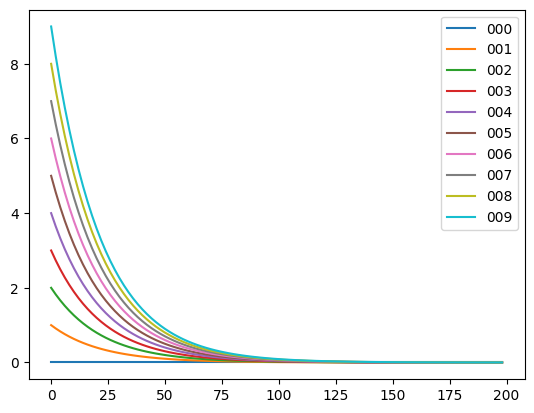

In [107]:
x = np.arange(0, d_hid, 2)
inds = slice(0, d_hid, 2)
for i in range(n_position):
    y = orig[i, inds]
    plt.plot(x, y, label=f'{i:03d}')
plt.legend()
plt.show()

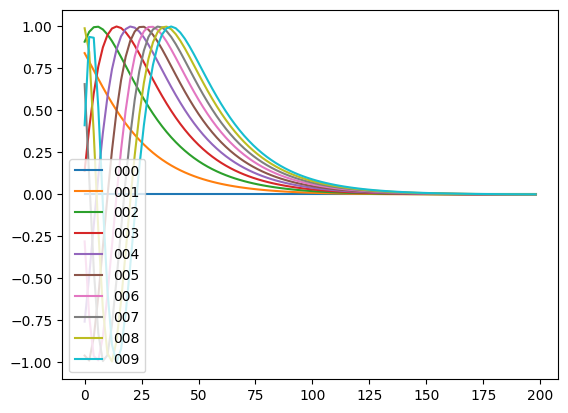

In [108]:
x = np.arange(0, d_hid, 2)
inds = slice(0, d_hid, 2)
for i in range(n_position):
    y = sin_table[i, inds]
    plt.plot(x, y, label=f'{i:03d}')
plt.legend()
plt.show()

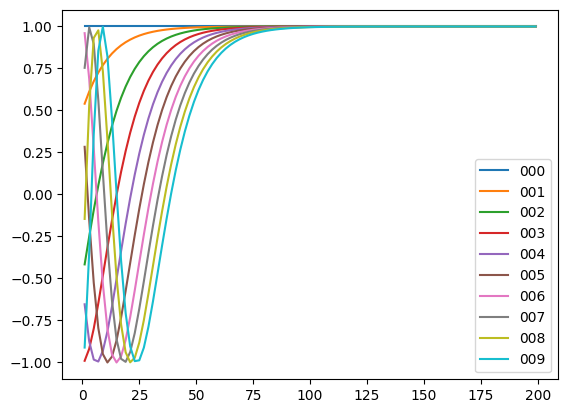

In [109]:
x = np.arange(1, d_hid, 2)
inds = slice(1, d_hid, 2)
for i in range(n_position):
    y = sin_table[i, inds]
    plt.plot(x, y, label=f'{i:03d}')
plt.legend()
plt.show()

In [115]:
def get_sinusoid_encoding_table_2(n_position, d_hid):
    ''' Sinusoid position encoding table '''
    # TODO: make it with torch instead of numpy

    def get_position_angle_vec(position):
        return [position / np.power(100, 2 * (hid_j // 2) / d_hid) for hid_j in range(d_hid)]

    orig = np.array([get_position_angle_vec(pos_i) for pos_i in range(n_position)])
    sinusoid_table = orig.copy()
    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])  # dim 2i
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])  # dim 2i+1

    return orig, sinusoid_table

In [126]:
n_position = 20
d_hid = 200
orig2, sin_table2 = get_sinusoid_encoding_table_2(n_position, d_hid)

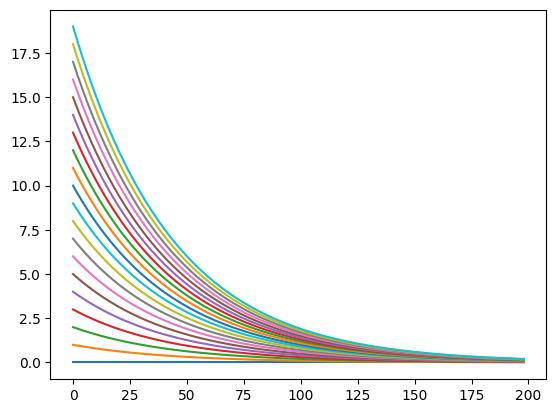

In [127]:
x = np.arange(0, d_hid, 2)
inds = slice(0, d_hid, 2)
for i in range(n_position):
    y = orig2[i, inds]
    plt.plot(x, y, label=f'{i:03d}')
# plt.legend()
plt.show()

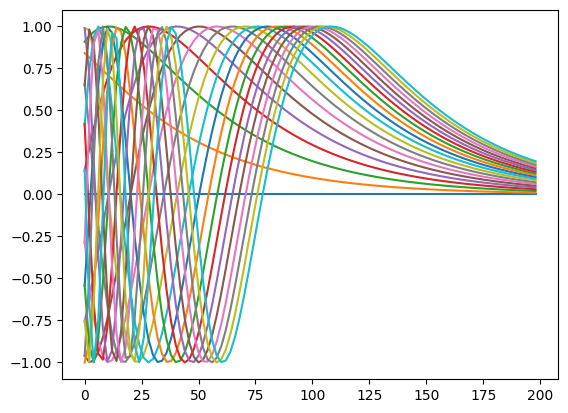

In [128]:
x = np.arange(0, d_hid, 2)
inds = slice(0, d_hid, 2)
for i in range(n_position):
    y = sin_table2[i, inds]
    plt.plot(x, y, label=f'{i:03d}')
# plt.legend()
plt.show()

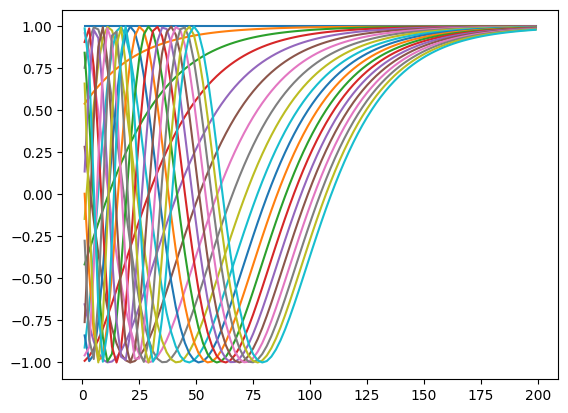

In [129]:
x = np.arange(1, d_hid, 2)
inds = slice(1, d_hid, 2)
for i in range(n_position):
    y = sin_table2[i, inds]
    plt.plot(x, y, label=f'{i:03d}')
# plt.legend()
plt.show()

In [43]:
sin_table[:, 151]

array([1.       , 0.9999995, 0.999998 , 0.9999955, 0.999992 , 0.9999875,
       0.999982 , 0.9999755, 0.999968 , 0.9999595])

In [44]:
# NLP Example
batch, sentence_length, embedding_dim = 20, 5, 10
embedding = torch.randn(batch, sentence_length, embedding_dim)
layer_norm = nn.LayerNorm(embedding_dim)
print(layer_norm.weight.shape, layer_norm.bias.shape)
# Activate module
layer_norm(embedding)

# Image Example
N, C, H, W = 20, 5, 10, 10
input = torch.randn(N, C, H, W)
# Normalize over the last three dimensions (i.e. the channel and spatial dimensions)
# as shown in the image below
layer_norm = nn.LayerNorm([C, H, W])
print(layer_norm.weight.shape, layer_norm.bias.shape)

output = layer_norm(input)

torch.Size([10]) torch.Size([10])
torch.Size([5, 10, 10]) torch.Size([5, 10, 10])


In [1]:
from transformers import pipeline, set_seed


In [2]:
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator('Hello, I\'m a language model,', max_length=30, num_return_sequences=5)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, but what I'm really doing is making a human-readable document. There are other languages, but those are"},
 {'generated_text': "Hello, I'm a language model, not a syntax model. That's why I like it. I've done a lot of programming projects.\n"},
 {'generated_text': "Hello, I'm a language model, and I'll do it in no time!\n\nOne of the things we learned from talking to my friend"},
 {'generated_text': "Hello, I'm a language model, not a command line tool.\n\nIf my code is simple enough:\n\nif (use (string"},
 {'generated_text': "Hello, I'm a language model, I've been using Language in all my work. Just a small example, let's see a simplified example."}]

In [6]:
generator('The population size of New-York is: ', max_length=30, num_return_sequences=1)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'The population size of New-York is: \xa04,000,000. As this is not a big city and the population increase of an'}]

In [93]:
import torch
from transformers import GPT2Tokenizer, GPT2Model, GPT2LMHeadModel
from transformers.modeling_outputs import BaseModelOutputWithPastAndCrossAttentions, CausalLMOutputWithCrossAttentions

In [94]:

tkz = GPT2Tokenizer.from_pretrained('gpt2')
# model: GPT2Model = GPT2Model.from_pretrained('gpt2')
model: GPT2LMHeadModel = GPT2LMHeadModel.from_pretrained('gpt2')
text = "Moscow city"
encoded_input = tkz(text, return_tensors='pt')
output1: CausalLMOutputWithCrossAttentions = model(**encoded_input)

loading file vocab.json from cache at /Users/misha/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/vocab.json
loading file merges.txt from cache at /Users/misha/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/merges.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /Users/misha/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/tokenizer_config.json
loading file tokenizer.json from cache at /Users/misha/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/tokenizer.json
loading configuration file config.json from cache at /Users/misha/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/config.json
Model config GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectu

In [95]:
text = "Moscow baby moscow city"
encoded_input = tkz(text, return_tensors='pt')
output2: CausalLMOutputWithCrossAttentions = model(**encoded_input)

In [96]:
text = "City Moscow"
encoded_input = tkz(text, return_tensors='pt')
output3: CausalLMOutputWithCrossAttentions = model(**encoded_input)

In [99]:
emb1, emb2, emb3 = output1.logits, output2.logits, output3.logits
emb1.shape, emb2.shape, emb3.shape

(torch.Size([1, 2, 50257]),
 torch.Size([1, 5, 50257]),
 torch.Size([1, 2, 50257]))

In [100]:
nm = lambda x: torch.linalg.vector_norm(x)
def dist(e1, e2):
    n1, n2 = e1.shape[1], e2.shape[1]
    n = min(n1, n2)
    return nm(e1[:, :n, :] - e2[:, :n, :])

In [101]:
dist(emb1, emb2), dist(emb1, emb3), dist(emb2, emb3)

(tensor(4996.3823, grad_fn=<LinalgVectorNormBackward0>),
 tensor(1012.6991, grad_fn=<LinalgVectorNormBackward0>),
 tensor(5038.4248, grad_fn=<LinalgVectorNormBackward0>))

In [34]:
output1.

(torch.Size([1, 2, 768]), torch.Size([1, 2, 768]), torch.Size([1, 2, 768]))

In [37]:
print(torch.nn.functional.cosine_similarity(output1.last_hidden_state.reshape(-1), output2.last_hidden_state.reshape(-1), dim=-1))
print(torch.nn.functional.cosine_similarity(output1.last_hidden_state.reshape(-1), output3.last_hidden_state.reshape(-1), dim=-1))
print(torch.nn.functional.cosine_similarity(output2.last_hidden_state.reshape(-1), output3.last_hidden_state.reshape(-1), dim=-1))

tensor(0.9907, grad_fn=<SumBackward1>)
tensor(0.9941, grad_fn=<SumBackward1>)
tensor(0.9848, grad_fn=<SumBackward1>)


In [4]:
s1, s2 = 'abc', '12345'
list(zip(s1, s2))

[('a', '1'), ('b', '2'), ('c', '3')]

In [23]:
import inspect
from pydantic import BaseModel

In [37]:
class LayerCfg(BaseModel):
    inp_sz: int
    dp_rate: float

class MainCfg(BaseModel):
    is_val: bool
    num: int
    layer: LayerCfg
    ld: dict[str, LayerCfg]

def f(is_val: bool, num: int):
    print(f'is_val = {is_val}, num = {num}')

In [50]:
main_cfg = MainCfg(is_val=True, num=22, layer=LayerCfg(inp_sz=12, dp_rate=0.1), ld={'one': LayerCfg(inp_sz=7, dp_rate=0.05)})
# f(**main_cfg.dict())

In [51]:
main_cfg.dict()

{'is_val': True,
 'num': 22,
 'layer': {'inp_sz': 12, 'dp_rate': 0.1},
 'ld': {'one': {'inp_sz': 7, 'dp_rate': 0.05}}}

In [52]:
# cfg2 = main_cfg.copy()
cfg2 = main_cfg.copy(deep=True)
cfg2.dict()

{'is_val': True,
 'num': 22,
 'layer': {'inp_sz': 12, 'dp_rate': 0.1},
 'ld': {'one': {'inp_sz': 7, 'dp_rate': 0.05}}}

In [53]:
cfg2.is_val = False
cfg2.layer.dp_rate = -0.3
cfg2.ld['one'] = LayerCfg(inp_sz=-1, dp_rate=0.01)
main_cfg.dict(), cfg2.dict()

({'is_val': True,
  'num': 22,
  'layer': {'inp_sz': 12, 'dp_rate': 0.1},
  'ld': {'one': {'inp_sz': 7, 'dp_rate': 0.05}}},
 {'is_val': False,
  'num': 22,
  'layer': {'inp_sz': 12, 'dp_rate': -0.3},
  'ld': {'one': {'inp_sz': -1, 'dp_rate': 0.01}}})

In [54]:
x = 1
tuple(x)

TypeError: 'int' object is not iterable

In [76]:
tkz = GPT2Tokenizer.from_pretrained('gpt2')


In [77]:
tkz.add_special_tokens({'pad_token': '<|pad|>'})

1

In [81]:
tkn = AddedToken('<|stoptoken|>')
tkz.add_tokens(tkn)
tkz

GPT2Tokenizer(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|pad|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50257: AddedToken("<|pad|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	50258: AddedToken("<|stoptoken|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
}

In [84]:
s = 'abc <|pad|> <|stoptoken|>'
tokens = tkz(s)
tokens


{'input_ids': [39305, 220, 50257, 220, 50258], 'attention_mask': [1, 1, 1, 1, 1]}

In [69]:
tkz.added_tokens_encoder['<|pad|>']
tkz.add_sp

50257

In [72]:
tkz.add_special_tokens({'pad_token': '<|pad|>', 'testt_token': '<|testt|>'})
tkz.added_tokens_encoder['<|pad|>'], tkz.added_tokens_encoder['<|testt|>']

TypeError: Token {'pad_token': '<|pad|>', 'testt_token': '<|testt|>'} is not a string but a <class 'dict'>.

In [93]:
s = 'a1 1 2 a12 12 a21 21 33 456 -1 0 01'
for c in s.split():
    print(f'`{c}`:', tkz(c)['input_ids'])

`a1`: [64, 16]
`1`: [16]
`2`: [17]
`a12`: [64, 1065]
`12`: [1065]
`a21`: [64, 2481]
`21`: [2481]
`33`: [2091]
`456`: [29228]
`-1`: [12, 16]
`0`: [15]
`01`: [486]


In [94]:
tkns = tkz(s)['input_ids']
print(tkns)

[64, 16, 352, 362, 257, 1065, 1105, 257, 2481, 2310, 4747, 604, 3980, 532, 16, 657, 5534]


In [95]:
for tkn in tkns:
    print(tkn, f'"{tkz.decode(tkn)}"')

64 "a"
16 "1"
352 " 1"
362 " 2"
257 " a"
1065 "12"
1105 " 12"
257 " a"
2481 "21"
2310 " 21"
4747 " 33"
604 " 4"
3980 "56"
532 " -"
16 "1"
657 " 0"
5534 " 01"


In [109]:
def ce(x):
    return -x * torch.log(x)

In [110]:
x = torch.arange(0, 1, 1 / 100)
y = ce(x)

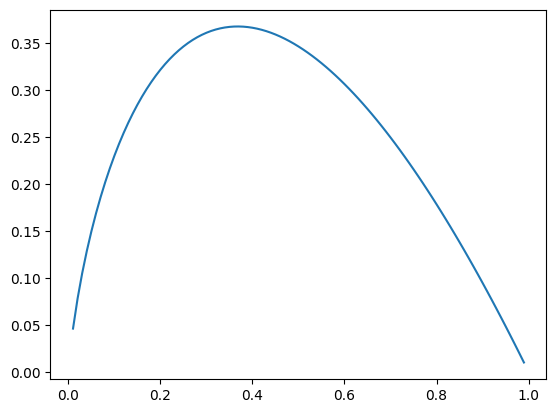

In [111]:
plt.plot(x, y)

In [112]:
import pandas as pd

In [123]:
df = pd.DataFrame({
    'ind': [1, 2, 3, 4, 5],
    'x': [0.1, 0.2, 0.3, 0.4, 0.5],
    'y': ['a', 'b', 'c', 'd', 'e'],
})
df.set_index('ind', inplace=True)
df

,x,y
ind,,
1,0.1,a
2,0.2,b
3,0.3,c
4,0.4,d
5,0.5,e


In [124]:
inds = df.index.to_numpy().copy()
inds

array([1, 2, 3, 4, 5])

In [125]:
np.random.shuffle(inds)

In [126]:
inds

array([3, 4, 2, 5, 1])

In [127]:
df

,x,y
ind,,
1,0.1,a
2,0.2,b
3,0.3,c
4,0.4,d
5,0.5,e


In [122]:
df.loc[[1, 2, 3]]

,x,y
ind,,
1,0.5,e
2,0.3,c
3,0.4,d


In [129]:
np.linspace(0, 5 * 10, 5 + 1)

array([ 0., 10., 20., 30., 40., 50.])

In [132]:
x = np.arange(20).reshape((5, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [135]:
[np.linalg.norm(x[i]) for i in range(len(x))]

[3.7416573867739413,
 11.224972160321824,
 19.131126469708992,
 27.09243436828813,
 35.07135583350036]

In [134]:
np.linalg.norm(x, axis=1)

array([ 3.74165739, 11.22497216, 19.13112647, 27.09243437, 35.07135583])

In [136]:
np.mean(x, axis=1)

array([ 1.5,  5.5,  9.5, 13.5, 17.5])